# Problem 4: Regularization and bias variance trade-off
Prof. V. I. Morgenshtern

Solver: A. Regensky

In this exercise, your goal is to implement regularized linear regression to predict the amount of water flowing out of a dam using the change of water level in a reservoir. In the file $\texttt{cross validation.py}$ your are given the dataset containing historical records on the change in the water level in a reservoir $x$, and the amount of water flowing out of the dam $y$. This dataset is divided into three parts:
* A training set that your model will learn on: $\texttt{X}, \texttt{y}$
* A cross validation set for determining the regularization parameter: $\texttt{Xval}$, $\texttt{yval}$.
* A test set for evaluating performance. These are “unseen” examples which your model did not see during training: $\texttt{Xtest}, \texttt{ytest}.$

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 100

1\. Visualize the training data on a scatter plot.

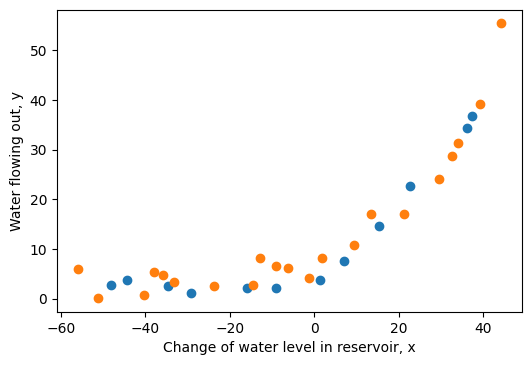

In [2]:
# Import the data
from cross_validation import X, y, Xtest, ytest, Xval, yval

trainSet = (np.asarray(X), np.asarray(y))
testSet = (np.asarray(Xtest), np.asarray(ytest))
valSet = (np.asarray(Xval), np.asarray(yval))

# Plot the training set
plt.scatter(trainSet[0], trainSet[1])
plt.scatter(testSet[0], testSet[1])
plt.xlabel('Change of water level in reservoir, x')
plt.ylabel('Water flowing out, y')
plt.show()

2\. Recall that regularized linear regression has the following cost function:
$$
\begin{align}
    J(\boldsymbol{\theta}) = \frac{1}{2n}\sum_{i=1}^n\left(h_{\boldsymbol{\theta}}(\boldsymbol{x}^{(i)})-y^{(i)} \right)^2 + \frac{\lambda}{2n}\sum_{j=1}^p \theta_j^2
\end{align}
$$
where $n$ is the number of training examples, $p$ is the number of features, $\lambda$ is the regularization parameter. Note that you should not regularize the $\theta_0$ term. We start by considering only the single original feature, the water level, and, therefore, $h_{\boldsymbol{\theta}}(x) = \theta_0 + \theta_1 x$. Calculate the gradient of $J(\boldsymbol{\theta})$ with respect to $\boldsymbol{\theta}$.



In [3]:
def cost(y, x, theta, lam=0.0):
    """
    Compute linear regression cost function with regularization
    lamda: regularization parameter, default: 0
    !! f must contain bias component as first column (all ones) !!!
    """
    n = y.shape[0]
    h_theta = x.dot(theta)
    
    # Standard linear regression cost term
    J_term = (1 / (2 * n) ) * np.sum(np.square(h_theta - y)) 
    # Regularization term
    reg_term = (lam / ( 2 * n) ) * np.sum(np.square(theta[1:])) 
    return (J_term + reg_term)
    
def gradient(y, x, theta, lam=0.0):
    n = y.shape[0]
    h_theta = x.dot(theta)
    gradient = (1 / n) * x.T.dot(h_theta-y)
    
    # Add regularization for all terms except the bias term
    gradient[1:] = gradient[1:] + (lam / n) * theta[1:] 

    return gradient

3\. Implement the gradient descent algorithm to fit the model, test that it converges for λ = 0. Plot the resulting linear fit on top of the training data scatter plot.

Iteration 1000, Cost=34.333786707136525
Iteration 2000, Cost=24.092680815397078
Iteration 3000, Cost=22.620907033557206
Iteration 4000, Cost=22.409394909006423
Iteration 5000, Cost=22.378997996529794
Iteration 6000, Cost=22.37462958365476
Iteration 7000, Cost=22.37400178860942
Iteration 8000, Cost=22.373911566684374
Iteration 9000, Cost=22.373898600676092
Iteration 10000, Cost=22.37389673730008


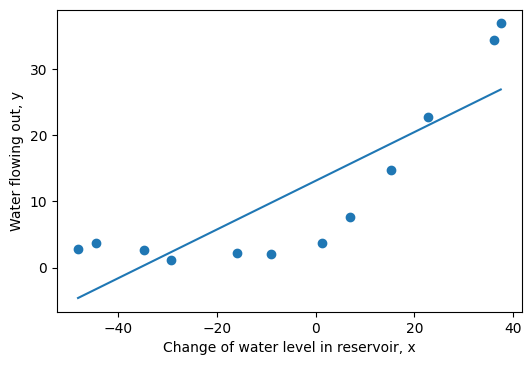

In [4]:
def gradient_descent(y, x, alpha, iters=1000, lam=0.0, initialTheta=None, verbose=True):
    """
    Run batch gradient descent with output y, features x, learning rate alpha, 
    costFunction(y, x, theta, lambda=lamda), costFunction_gradient(y, x, theta, lambda=lamda)
    Optional params: 
    - iters: number of iterations to run
    - lam: regularization parameter
    - initialTheta: initial parameter vector
    - verbose: Print progress information
    """
    n, feats = x.shape # Number of training examples, number of features
    if initialTheta is not None:
        theta = initialTheta
    else:
        theta = np.zeros(feats)
        
    for i in range(0, iters):
        # Display some information on current progress at intervals of 10% of total iterations
        if verbose and ((i + 1) % (iters / 10) == 0):  
            print("Iteration {0}, Cost={1}". format(i + 1, cost(y, x, theta, lam=lam)))
            
        theta = theta - alpha * gradient(y, x, theta, lam=lam)
    return theta

def add_bias(arr):
    """Add the all-ones bias component to arr (as first column)."""
    if (arr.ndim == 1):
        arr = np.reshape(arr, (arr.shape[0], 1))
    return np.hstack((np.ones((arr.shape[0], 1)), arr))

# Add bias component to X, Xtest, Xval
X = add_bias(trainSet[0])
Xtest = add_bias(testSet[0])
Xval = add_bias(valSet[0])

# Train the linear regression model
theta = gradient_descent(trainSet[1], X, 0.001, iters=10000)

# Plot the linear regression fit
xreg = np.linspace(np.min(trainSet[0]), np.max(trainSet[0]), 100)
xreg_ = add_bias(xreg)

plt.scatter(trainSet[0], trainSet[1])
plt.plot(xreg, xreg_.dot(theta))
plt.xlabel('Change of water level in reservoir, x')
plt.ylabel('Water flowing out, y')
plt.show()

4\. Next, your goal is to plot the learning curve. Set λ = 0. The training set contains 12 data points. Fit the model by using only the first two data points (n = 2). Recall that the error for a dataset is defined as:
$$
\begin{align}
    J_{\text{error}}(\boldsymbol{\theta})=\frac{1}{2n}\sum_{i=1}^n\left(h_\theta(x^{(i)}-y^{(i)}\right)^2
\end{align}
$$
Calculate $J_{\text{error}}$ of the fitted model on this two-data-points-large training set (this is the training error). Record the result. Calculate the $J_{\text{error}}$ of the fitted model on the whole validation set. Record the result. Next repeat the processes by using the first three data points for training (n = 3), then the first four data points (n = 4) and so on. Plot the training error, as a function of the number of data points used. This is the learning curve. Plot $J_{\text{train}}$ on the validation set (this is the validation error) as the function of the number of data points used. If you did everything correctly, you should observe the following. The training error increases as the number of training examples grows. The validation error decreases as the number of training examples grows. The validation error is higher than the training error.


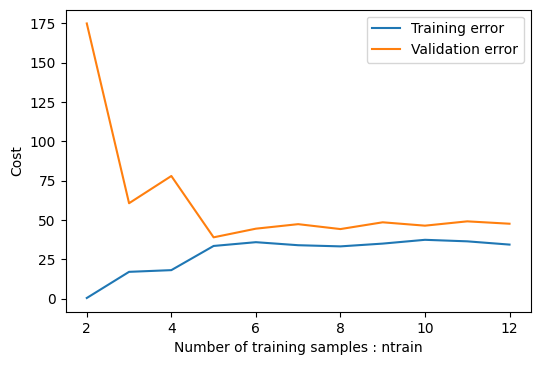

In [5]:
def learning_curve(trainSet, valSet, alpha, iters=1000, 
                   lam=0.0, initialTheta=None, verbose=True):
    """Creates the learning curve as a function of the number of used training examples.
    Returns:
    - Jerror (cost on fraction of training set)
    - Jval (cost on validation set)
    BOTH as function of the number of used training examples."""
    # Extract training set size
    ntrain = trainSet[0].shape[0]
    
    # Get the input feature matrix from train and valid dataset
    X = trainSet[0]
    Xval = valSet[0]

        
    
    # Initialize learning curve arrays and loop through fractions of training set
    Jerror = np.zeros(ntrain-1)
    Jval = np.zeros(ntrain-1)
    for n in range(2,ntrain+1):
        theta = gradient_descent(trainSet[1][:n], X[:n], alpha, iters=iters, 
                                 lam=lam, initialTheta=initialTheta, verbose=verbose)
        Jerror[n-2] = cost(trainSet[1][:n], X[:n], theta, lam=lam)
        Jval[n-2] = cost(valSet[1], Xval, theta, lam=lam)
    return Jerror, Jval

# Add bias term
trainSet_bias = (add_bias(trainSet[0]),trainSet[1])
valSet_bias = (add_bias(valSet[0]),valSet[1])
# Create learning curve
Jerror, Jval = learning_curve(trainSet_bias, valSet_bias, 0.0001, iters=10000, verbose=False)

# Plot learning curve
ntrains = np.arange(2,trainSet[0].shape[0]+1)
plt.plot(ntrains, Jerror)
plt.plot(ntrains, Jval)
plt.xlabel('Number of training samples : ntrain')
plt.ylabel('Cost')
plt.legend(('Training error', 'Validation error'))
plt.show()

5\. You can observe that the validation error is always high and the training error becomes high when the number of training examples is increased. This reflects a high bias problem in the model – the linear regression model is too simple and is unable to fit our dataset well. In this part of the exercise, you will address this problem by adding more features, using the polynomial regression. Our hypothesis has the form:
$$
\begin{align}
    h_\theta(x) = \theta_0 + \theta_1\cdot(\text{water level}) + \theta_2\cdot(\text{water level})^2 + ... + \theta_p\cdot(\text{water level})^p\text{.}
\end{align}
$$
For this part of the exercise, you will be using a polynomial of degree p = 8. Proceed as before to fit this model without regularization. Plot the learning and validation curves. Also plot the fitted polinomial curve on top of the training data scatter plot.

$\textbf{Important tip:}$ To make the problem numerically well conditioned, it is crucial to normalize the features before fitting the polynomial model above. This is because, for example if $x = 40$, we will now have a feature $x_8 = 40^8 = 6.5 · 10^{12}$ which will make numerical algorithms unstable. Rescale the features by subtracting the mean and dividing by the standard deviation for each feature separately. Don’t forget to account for this rescaling when working with the validation set and the test set.
When you plot the learning curve, you should observe that the training error is extremely small. The validation error is large. This means that the model has very high bias and essentially fits the noise.



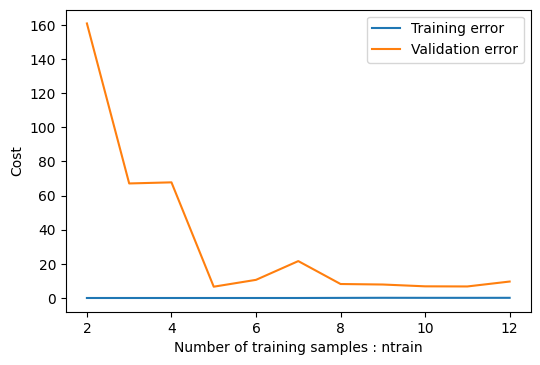

Iteration 10000, Cost=0.21264805963854763
Iteration 20000, Cost=0.1894568601494243
Iteration 30000, Cost=0.17272414474919118
Iteration 40000, Cost=0.15873869933434304
Iteration 50000, Cost=0.14646921058842383
Iteration 60000, Cost=0.13555095835060021
Iteration 70000, Cost=0.12579465342174945
Iteration 80000, Cost=0.11706475882147171
Iteration 90000, Cost=0.10924850867211475
Iteration 100000, Cost=0.10224728127061791


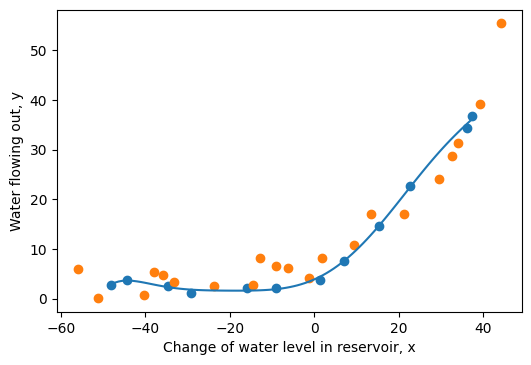

In [6]:
def get_polynomials(X, maxOrder, addBias=True):
    """Get all polynomials up to maxOrder and add bias component
        as first column
    - addBias: Wether or not to add a bias component."""
    features = np.ones((X.shape[0], maxOrder))
    for p in range(1, maxOrder + 1):
        features[:, p - 1] = X**p
    if (addBias):
        features = np.hstack((np.ones((X.shape[0], 1)), features))
    return features
    
def feature_normalize(f, meanStd=None, hasBias=True):
    """Normalizes the features to have mean 0 and variance 1.
    - meanStd: If None, return used mean and std as tuple as well
               If tuple (mean, std), normalize columns by these
    - hasBias: If true, skips first column of f as this represents the bias component
    Returns the normalized features and meanStd."""
    
    # Compute mean and standard devition if meanStd is not given.
    if (not meanStd):
        mean = np.mean(f, axis=0)
        std = np.std(f, axis=0)
        meanStd = (mean, std)
    
    # Initialize normalized features matrix
    f_norm = np.ones(f.shape)
    for i in range(0, f.shape[1]):
        if (i==0 and hasBias):
            continue
        f_norm[:,i] = (f[:,i] - meanStd[0][i]) / meanStd[1][i]
    return f_norm, meanStd
        
# Get the polynomial features
X_pol = get_polynomials(trainSet[0], 8, addBias=True)
Xval_pol = get_polynomials(valSet[0], 8, addBias=True)
Xtest_pol = get_polynomials(testSet[0], 8, addBias=True)

# Normalize the features
X_norm, meanStd = feature_normalize(X_pol, hasBias=True)
Xval_norm, _ = feature_normalize(Xval_pol, meanStd=meanStd, hasBias=True)
Xtest_norm, _ = feature_normalize(Xtest_pol, meanStd=meanStd, hasBias=True)

# Create learning curve
Jerror, Jval = learning_curve((X_norm, trainSet[1]), (Xval_norm, valSet[1]), 0.1, 
                              iters=100000, verbose=False)

# Plot learning curve
ntrains = np.arange(2, trainSet[0].shape[0] + 1)
plt.plot(ntrains, Jerror)
plt.plot(ntrains, Jval)
plt.xlabel('Number of training samples : ntrain')
plt.ylabel('Cost')
plt.legend(('Training error', 'Validation error'))
plt.show()

# Train on complete training set
theta = gradient_descent(trainSet[1], X_norm, 0.1, iters=100000, verbose=True)

# Plot the linear regression fit
xreg = np.linspace(np.min(trainSet[0]), np.max(trainSet[0]), 100)
xreg_ = get_polynomials(xreg, 8, addBias=True)
xreg_norm, _ = feature_normalize(xreg_, meanStd=meanStd, hasBias=True)

plt.scatter(trainSet[0], trainSet[1])
plt.scatter(testSet[0], testSet[1])
plt.plot(xreg, xreg_norm.dot(theta))
plt.xlabel('Change of water level in reservoir, x')
plt.ylabel('Water flowing out, y')
plt.show()


Observe that the training error is extremely small. The validation error is large. This means that the model is overfitting on the training sampling and has very high variance.

6\. To avoid this problem, you can now use regularization. Fit the regularized regression for $\lambda = \{0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10\}$. Plot the learning and the validation curves. Use the validation set to select the best value for $\lambda$, i.e. the value that makes the validation error (when the model is fitted on the whole dataset with n = 12) as small as possible. Plot the resulting polynomial fit on top of the training data scatter plot for the optimal $\lambda$ and for $\lambda = 100$. Discuss your results.

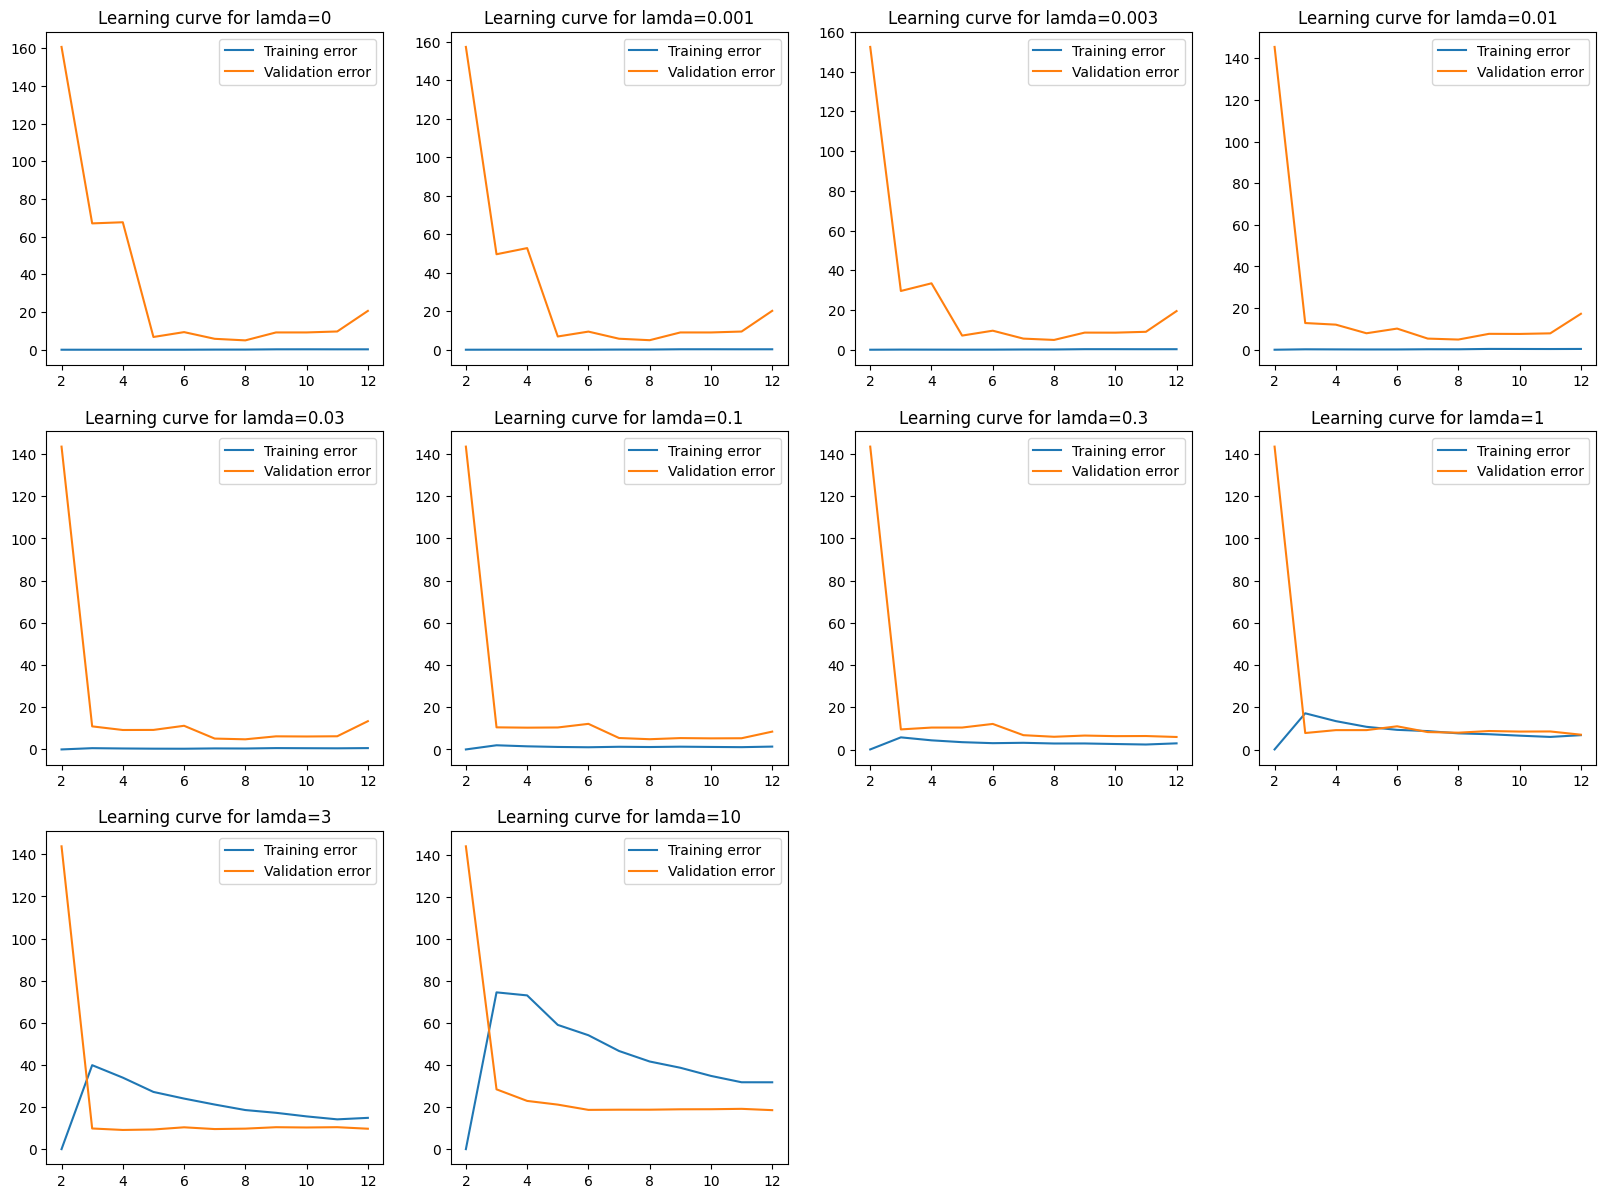

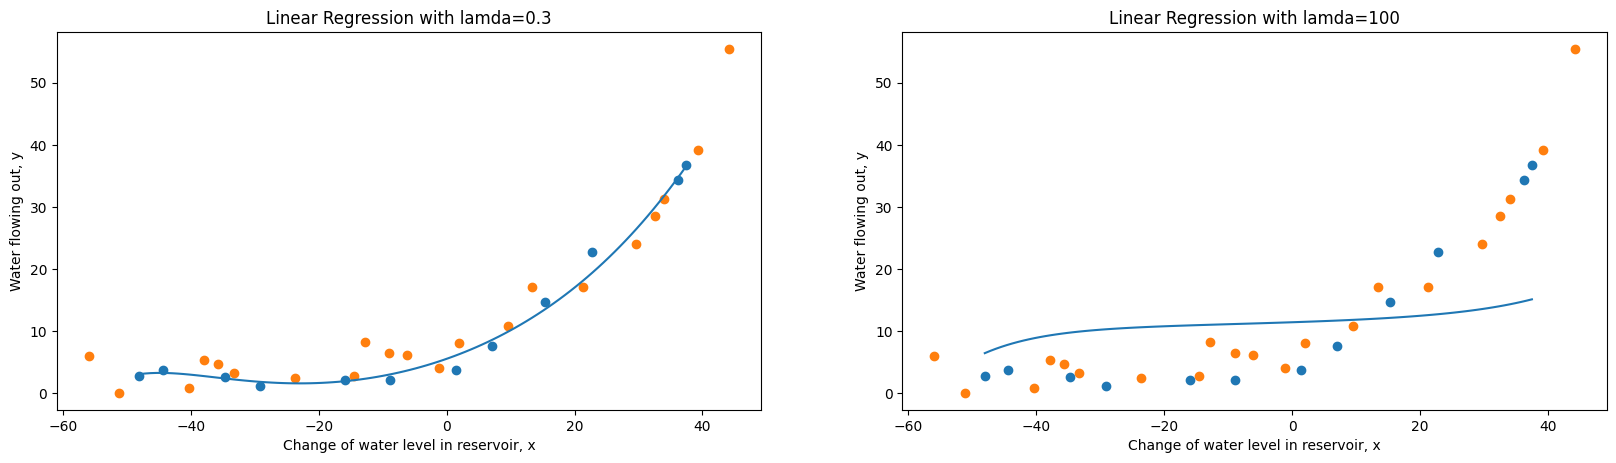

Best cost on validation set for lamda=0.3: 5.931957047510033


In [7]:
lambdas = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

# Test with all lamdas and track best performing lamda
Jerrors = []
Jvals = []
bestLam = lambdas[0]
bestCost = np.infty
for lam in lambdas:
    Jerror, Jval = learning_curve((X_norm, trainSet[1]), (Xval_norm, valSet[1]), 0.01, 
                                 lam=lam, iters=100000, verbose=False)
    Jerrors.append(Jerror)
    Jvals.append(Jval)
    if (Jval[-1] < bestCost):
        bestCost = Jval[-1]
        bestLam = lam
        
        
# Plot learning curves
plotsPerRow=4
plt.figure(figsize=(20,15))
for i in range(len(lambdas)):
    plt.subplot(int(np.ceil(float(len(lambdas)) / float(plotsPerRow))), plotsPerRow, i+1)
    plt.plot(ntrains, Jerrors[i])
    plt.plot(ntrains, Jvals[i])
    plt.title("Learning curve for lamda={0}".format(lambdas[i]))
    plt.legend(('Training error', 'Validation error'))
plt.show()

# Plot polynomial fit for optimal lamda
bestTheta = gradient_descent(trainSet[1], X_norm, 0.01, 
                             lam=bestLam, iters=100000, verbose=False)


plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(trainSet[0], trainSet[1])
plt.scatter(testSet[0], testSet[1])
plt.plot(xreg, xreg_norm.dot(bestTheta))
plt.title("Linear Regression with lamda={0}".format(bestLam))
plt.xlabel('Change of water level in reservoir, x')
plt.ylabel('Water flowing out, y')

# Plot polynomial fit for lamda=100
theta = gradient_descent(trainSet[1], X_norm, 0.01, lam=100, iters=100000, verbose=False)

plt.subplot(1, 2, 2)
plt.scatter(trainSet[0], trainSet[1])
plt.scatter(testSet[0], testSet[1])
plt.plot(xreg, xreg_norm.dot(theta))
plt.title("Linear Regression with lamda={0}".format(100))
plt.xlabel('Change of water level in reservoir, x')
plt.ylabel('Water flowing out, y')
plt.show()

print("Best cost on validation set for lamda={0}: {1}".format(bestLam, bestCost))

7\. Run prediction with the best possible λ on the test set. Calculate error $J_{\text{error}}$ on the test set. Make sure that the error on the test set is not too much larger than the error on the validation set. This means that your model is well regularized and you can have confidence that it will perform well on future data.

In [8]:
Jerror_test = cost(testSet[1], Xtest_norm, bestTheta, lam=bestLam)
print("Error on test set: {0}".format(Jerror_test))

Error on test set: 6.492194211639926
